In [1]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from wordcloud import WordCloud

In [4]:
df = pd.read_csv(r"D:\kaggle\data\winemag-data-130k-v2.csv")

In [5]:
df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [12]:
df.shape

(129971, 14)

In [14]:
len(df.variety.unique())

708

In [15]:
df.variety.unique()[0:5])

array(['White Blend', 'Portuguese Red', 'Pinot Gris', 'Riesling',
       'Pinot Noir'], dtype=object)

In [18]:
print(", ".join(df.variety.unique()[0:5]))

White Blend, Portuguese Red, Pinot Gris, Riesling, Pinot Noir


In [19]:
df[["country", "description","points"]].head()

,country,description,points
0,Italy,"Aromas include tropical fruit, broom, brimston...",87
1,Portugal,"This is ripe and fruity, a wine that is smooth...",87
2,US,"Tart and snappy, the flavors of lime flesh and...",87
3,US,"Pineapple rind, lemon pith and orange blossom ...",87
4,US,"Much like the regular bottling from 2012, this...",87


In [20]:
country = df.groupby("country")

In [21]:
country.describe().head()

Unnamed: 0                                       \
                            count          mean           std      min   
country                                                                  
Argentina                  3800.0  65075.723158  38080.749866     16.0   
Armenia                       2.0  37158.000000  40995.222746   8170.0   
Australia                  2329.0  65037.539287  37271.655310     77.0   
Austria                    3345.0  65614.296861  37455.323032     93.0   
Bosnia and Herzegovina        2.0  56613.000000  56775.017675  16467.0   

                                                               points  \
                             25%      50%       75%       max   count   
country                                                                 
Argentina               30912.25  65171.5  99149.25  129948.0  3800.0   
Armenia                 22664.00  37158.0  51652.00   66146.0     2.0   
Australia               34120.00  64984.0  96027.00  129726.0  2329.0   
Austria                 32623.00  67701.0  98385.00  129939.0  3345.0   
Bosnia and Herzegovina  36540.00  56613.0  76686.00   96759.0     2.0   

                                   ...                 price             \
                             mean  ...    75%    max   count       mean   
country                            ...                                    
Argentina               86.710263  ...  89.00   97.0  3756.0  24.510117   
Armenia                 87.500000  ...  87.75   88.0     2.0  14.500000   
Australia               88.580507  ...  91.00  100.0  2294.0  35.437663   
Austria                 90.101345  ...  92.00   98.0  2799.0  30.762772   
Bosnia and Herzegovina  86.500000  ...  87.25   88.0     2.0  12.500000   

                                                                     
                              std   min    25%   50%    75%     max  
country                                                              
Argentina               23.430122   4.0  12.00  17.0  25.00   230.0  
Armenia                  0.707107  14.0  14.25  14.5  14.75    15.0  
Australia               49.049458   5.0  15.00  21.0  38.00   850.0  
Austria                 27.224797   7.0  18.00  25.0  36.50  1100.0  
Bosnia and Herzegovina   0.707107  12.0  12.25  12.5  12.75    13.0  

[5 rows x 24 columns]

In [22]:
country.mean().sort_values(by="points",ascending=False).head()

,Unnamed: 0,points,price
country,,,
England,72597.756757,91.581081,51.681159
India,68964.000000,90.222222,13.333333
Austria,65614.296861,90.101345,30.762772
Germany,65787.590762,89.851732,42.257547
Canada,70582.365759,89.369650,35.712598


In [78]:
text = (list(df["country"][:300]))

In [79]:
text[:10]

['Italy',
 'Portugal',
 'US',
 'US',
 'US',
 'Spain',
 'Italy',
 'France',
 'Germany',
 'France']

In [80]:
text1 = " ".join(text)
print(text1)

Italy Portugal US US US Spain Italy France Germany France US France US Italy US Germany Argentina Argentina Spain US US US Italy US Italy US Italy Italy Italy US France Italy Italy US US US Chile Italy Italy Italy Italy US France US Chile US Italy US US France Italy Chile Italy France Italy US US Italy Chile US US Italy US France US France France US US France US US Italy US US US Germany Australia US Portugal Chile Spain France Australia US Germany US US Italy Italy US US US Austria US France France US Italy US US US US Chile Italy Italy Italy Italy US Italy France US Italy Italy US US US US Italy France Italy US US Australia US South Africa France France France South Africa Italy France South Africa Italy US Italy France South Africa France France Italy Italy US France US US US US Germany US US Portugal US US Spain US Germany Portugal Italy Italy France US US France Chile Chile France US US US Germany Germany Chile US New Zealand Italy Chile Italy US France US US Italy Argentina US Ch

In [88]:
wordcloud = WordCloud(background_color="white").generate(text1)

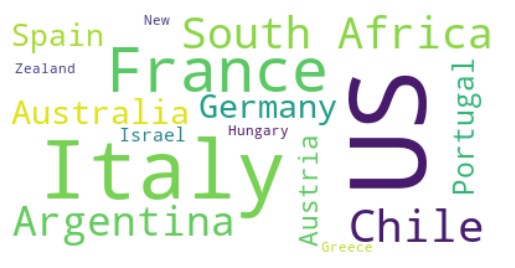

In [86]:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [72]:
df.description

0         Aromas include tropical fruit, broom, brimston...
1         This is ripe and fruity, a wine that is smooth...
2         Tart and snappy, the flavors of lime flesh and...
3         Pineapple rind, lemon pith and orange blossom ...
4         Much like the regular bottling from 2012, this...
                                ...                        
129966    Notes of honeysuckle and cantaloupe sweeten th...
129967    Citation is given as much as a decade of bottl...
129968    Well-drained gravel soil gives this wine its c...
129969    A dry style of Pinot Gris, this is crisp with ...
129970    Big, rich and off-dry, this is powered by inte...
Name: description, Length: 129971, dtype: object

In [97]:
df.country.head()

0       Italy
1    Portugal
2          US
3          US
4          US
Name: country, dtype: object

In [98]:
df.country.unique()

array(['Italy', 'Portugal', 'US', 'Spain', 'France', 'Germany',
       'Argentina', 'Chile', 'Australia', 'Austria', 'South Africa',
       'New Zealand', 'Israel', 'Hungary', 'Greece', 'Romania', 'Mexico',
       'Canada', nan, 'Turkey', 'Czech Republic', 'Slovenia',
       'Luxembourg', 'Croatia', 'Georgia', 'Uruguay', 'England',
       'Lebanon', 'Serbia', 'Brazil', 'Moldova', 'Morocco', 'Peru',
       'India', 'Bulgaria', 'Cyprus', 'Armenia', 'Switzerland',
       'Bosnia and Herzegovina', 'Ukraine', 'Slovakia', 'Macedonia',
       'China', 'Egypt'], dtype=object)

In [114]:
df[df.country.isnull()]

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
913,913,NaN,"Amber in color, this wine has aromas of peach ...",Asureti Valley,87,30.0,NaN,NaN,NaN,Mike DeSimone,@worldwineguys,Gotsa Family Wines 2014 Asureti Valley Chinuri,Chinuri,Gotsa Family Wines
3131,3131,NaN,"Soft, fruity and juicy, this is a pleasant, si...",Partager,83,NaN,NaN,NaN,NaN,Roger Voss,@vossroger,Barton & Guestier NV Partager Red,Red Blend,Barton & Guestier
4243,4243,NaN,"Violet-red in color, this semisweet wine has a...",Red Naturally Semi-Sweet,88,18.0,NaN,NaN,NaN,Mike DeSimone,@worldwineguys,Kakhetia Traditional Winemaking 2012 Red Natur...,Ojaleshi,Kakhetia Traditional Winemaking
9509,9509,NaN,This mouthwatering blend starts with a nose of...,Theopetra Malagouzia-Assyrtiko,92,28.0,NaN,NaN,NaN,Susan Kostrzewa,@suskostrzewa,Tsililis 2015 Theopetra Malagouzia-Assyrtiko W...,White Blend,Tsililis
9750,9750,NaN,This orange-style wine has a cloudy yellow-gol...,Orange Nikolaevo Vineyard,89,28.0,NaN,NaN,NaN,Jeff Jenssen,@worldwineguys,Ross-idi 2015 Orange Nikolaevo Vineyard Chardo...,Chardonnay,Ross-idi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124176,124176,NaN,This Swiss red blend is composed of four varie...,Les Romaines,90,30.0,NaN,NaN,NaN,Jeff Jenssen,@worldwineguys,Les Frères Dutruy 2014 Les Romaines Red,Red Blend,Les Frères Dutruy
129407,129407,NaN,Dry spicy aromas of dusty plum and tomato add ...,Reserve,89,22.0,NaN,NaN,NaN,Michael Schachner,@wineschach,El Capricho 2015 Reserve Cabernet Sauvignon,Cabernet Sauvignon,El Capricho
129408,129408,NaN,El Capricho is one of Uruguay's more consisten...,Reserve,89,22.0,NaN,NaN,NaN,Michael Schachner,@wineschach,El Capricho 2015 Reserve Tempranillo,Tempranillo,El Capricho
129590,129590,NaN,"A blend of 60% Syrah, 30% Cabernet Sauvignon a...",Shah,90,30.0,NaN,NaN,NaN,Mike DeSimone,@worldwineguys,Büyülübağ 2012 Shah Red,Red Blend,Büyülübağ


In [118]:
df.dropna(subset=['country'], inplace=True)

In [119]:
df[df.country.isnull()]

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery


In [120]:
text = " ".join(country for country in df.country)

In [121]:
wordcloud = WordCloud(background_color="white").generate(text)

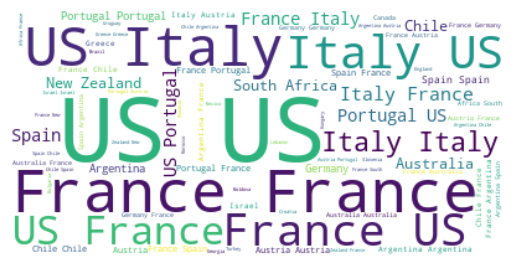

In [122]:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()